# Population Evolution Simulation

In this notebook, we will look at how population can evolve over time. 

We will describe the population at time step $t$ as $x_t$, and assume $0 \leq x_t \leq 1$ for all $t$.

The more population there is, the faster it can reproduce. So there is an interaction between the current population that is linear. Thus, $x_{t+1} = a x_t$, where $a$ is some coefficient.

However, this does not account for when the population is near the maximum, in which case overpopulation makes the population decrease. The interaction in this case is proportional to $1-x$.

Thus, our population map is $x_{t+1} = a x_t (1-x_t)$.

The parameter $a$ shows how much the population can grow, and for reasons we will see, it needs to be $1 \leq a \leq 4$ to show anything interestng, and when $3 \leq a \leq 4$, the map becomes very sensitive to the parameter.

In [2]:
import numpy as np
from IPython import display
import matplotlib.pyplot as plt
from ipywidgets import interact

def plot(data,clear=True):
    if clear:
        display.clear_output(wait=True)
    plt.clf()
    
    ax = plt.gca()
    ax.yaxis.tick_right()
    ax.yaxis.set_ticks_position('both')
    ax.yaxis.grid(True)
    
    plt.plot(data)
    plt.legend(['Loss'], loc='lower left')

# Population Transition with time steps

We can plot the change of population over time steps with different parameter.

Notice that when $r<3$, the plot converges towards a value, but as $r$ becomes closer to 3, the it starts to oscilate, and at $r=3$, it never reaches a single value.

As $r$ increases, the graph will tend to oscilate between larger values, until at 3.25, where it starts to oscilate between more values.

The plot will keep oscilating more and more values as $r$ increases. This process is called bifurcation.

At some point, the bifurcation happens so fast that it is impossible to tell what the plot is doing, and becomes chaotic, until around $r=3.83$, where it becomes calm, but then bifurcates again as $r$ increases more.

In [23]:
def manipulate(r=3.83,x=0.65):
    values = [x]
    
    for i in range(100):
        x = r*x*(1-x)
        values.append(x)
    plt.plot(values)
    plt.show()
    
%matplotlib inline
interact(manipulate,r=(2,4,0.01),x=(0,1,0.01))

interactive(children=(FloatSlider(value=3.83, description='r', max=4.0, min=2.0, step=0.01), FloatSlider(value…

<function __main__.manipulate(r=3.83, x=0.65)>

# Cobweb Diagram

With a iterated map, the cobweb diagram is helpful to look at. 

A cobweb diagram plots the mapping function to the identity function. 

The mapping function shows how the values gets mapped in the next time step, and in our case, is $a x(x-1)$.

Plotting is done by putting a point on the identity function, map to the mapping function, which is done by going vertically to the mapping function, then coming back to the identity function, by going horizontally to the identity function.

Repeat this a number of times, and you can see that when $r<3$, the graph quickly spirals inwards, but when $3<r<3.25$, the graph oscilates. With larger $r$, the plot becomes chaotic, except when $r=3.83$ at some points, when it becomes calm again.

In [40]:
def manipulate(r=3.63,x=0.11):
    values = np.arange(0,1,0.01)
    
    plt.plot(values,values)
    plt.plot(values,r * values * (1-values))
    
    values = [x,x]
    for i in range(100):
        x=r*x*(1-x)
        values+=[x,x]
    
    plt.plot(values[:1]+values,values+values[-1:])
    plt.show()
    
%matplotlib inline
interact(manipulate,r=(2,4,0.01),x=(0,1,0.01))

interactive(children=(FloatSlider(value=3.63, description='r', max=4.0, min=2.0, step=0.01), FloatSlider(value…

<function __main__.manipulate(r=3.63, x=0.11)>

# Bifurcation diagram

The bifurcation diagram shows what values the maps will end up taking after sufficiently large iterations.

It is useful to see how the stable points evolve as a parameter is used, and can see how the stable points bifurcate.

This can give you a lot of insight, if paired with the cobweb diagram. Try to manipulate the cob web diagram, and ask yourself

1. Why does bifurcation happen in the first place?

2. Why does the plot suddenly becomes orderly at $a=3.83$, and if you look closely, also at $a=3.63$ and $a=3.74$, what is the condition to make this happen?

3. What is happening around $a=3.68$ when the lower and the higher branches of the bifurcations meet?

4. What is the faint line going from the second bifurcation line from the top, curving visibly towards $a=4$, going through the middle stable point at $a=3.83$, and another pair of lines that starts from the third bifurcation line, curving visibly through the top and bottom stable points at $a=3.83$?

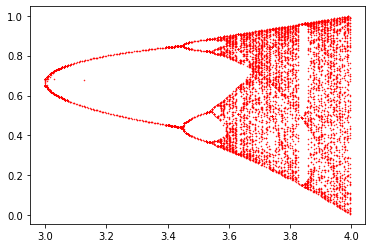

In [38]:
def bifurcate(start=1,end=4,interval=100):
    display.clear_output(wait=True)
    plt.clf()
    values = np.repeat(np.expand_dims(np.arange(0,1,0.01),0),(end-start)*interval,0).T
    
    for i in range(200):
        values = np.arange(start,end,1/interval)*values*(1-values)
    
    values = values.T
    
    values = [set(j for j in i if j!=0) for i in values]
    
    for x,y in zip(np.arange(start,end,1/interval),values):
        
        x = np.repeat(x,len(y))
        y = list(y)
        plt.scatter(x,y,s=1,color='Red',marker='.')

bifurcate(3,4,200)


In [14]:
np.repeat(np.expand_dims(np.arange(0,1,0.01),0),(4-1)*100,0).T.shape

(100, 300)